# Cab Forecasting System

###The automated process of renting a cab through an app is known as a "cab booking system". Utilizing this app people can order a cab from one location to another.

### **OBJECTIVE-** The goal of this project is to combine historical usage patterns with publicly available data sources, such as weather data, to predict whether or not someone will book a cab in a city.

## Load dataset and import libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77.0,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79.0,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50.0,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29.0,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51.0,19.0012


Descriptions of the columns present in the dataset:

*   datetime - hourly date + timestamp
*   season - spring, summer, autumn, winter
*   holiday - whether the day is considered a holiday
*   workingday - whether the day is neither a weekend nor holiday
*   temp - temperature in Celsius
*   weather - Clear , Cloudy, Light Rain, Heavy 
*   atemp - "feels like" temperature in Celsius
*   humidity - relative humidity
*   windspeed - wind speed
*   Total_booking - number of total booking

In [3]:
df_l=pd.read_csv("train_label.csv", header=None)
df["Total_booking"]=df_l[0]
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77.0,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79.0,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50.0,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29.0,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51.0,19.0012,184


The model will predict if a person will book a cab based on these features as.
*   datetime - Time of day heavily depends on bookings made as people tend to make less bookings during mid night.
*   season - People may use cabs even for shorter distance in winter to save themselves from cold.
*   holiday - May decrease number of bookings as persons who use cabs for office on daily basis will not go
*   workingday - May increase number of bookings
*   temp - May decrease as more people will like to stay at home.
*   weather - People may use more cabs in rainy season to save them from rain.
*   humidity - People may tend to stay at home due to higher humidity.
*   windspeed - High wind speed may increase the number of cab bookings.

In [4]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8706.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.654261,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.198846,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


### Creating target Variable for Classification
If "book" is equal to 1 it means a person will book a cab otherwise not.

In [5]:
median=df.Total_booking.median()
df["Book"]=df.Total_booking>=median
df["Book"]=df["Book"].map({True: 1, False: 0})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Book
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77.0,16.9979,504,1
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79.0,19.0012,5,0
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50.0,22.0028,139,0
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29.0,8.9981,209,1
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51.0,19.0012,184,1


Similarly for Testing data

In [6]:
df_test=pd.read_csv("test.csv")
df_test_label=pd.read_csv("test_label.csv", header=None)
df_test["Total_booking"]=df_test_label[0]
median=df_test.Total_booking.median()
df_test["Book"]=df_test.Total_booking>=median
df_test["Book"]=df_test["Book"].map({True: 1, False: 0})
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Book
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,1
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,0
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,0
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,0
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,1


# Analyse the Dataset

In [7]:
print("Shape of training data", df.shape)
print("Shape of test data", df_test.shape)

Shape of training data (8708, 11)
Shape of test data (2178, 11)


In [8]:
df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity         float64
windspeed        float64
Total_booking      int64
Book               int64
dtype: object

### Checking for missing values

In [9]:
df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         2
windspeed        0
Total_booking    0
Book             0
dtype: int64

Two values of humidity were missing

In [10]:
df[df.humidity.isna()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Book
11,9/10/2012 20:00,Fall,0,1,Clear + Few clouds,24.60,31.06,NaN,12.9980,390,1
14,2/9/2012 14:00,Spring,0,1,Clear + Few clouds,13.12,15.15,NaN,19.9995,144,0


In [11]:
df.groupby("season")["humidity"].mean()

season
Fall      63.877057
Spring    55.979859
Summer    60.811561
Winter    65.818390
Name: humidity, dtype: float64

Using mean value of humidity based on season to fill missing values.

In [12]:
df["humidity"][11]=df.groupby("season")["humidity"].mean()["Fall"]
df["humidity"][14]=df.groupby("season")["humidity"].mean()["Spring"]

In [13]:
df["humidity"][14]

55.97985948477752

In [14]:
df.duplicated().any()

False

## Observations

1.   Training Data contains 8708 records with 10 columns
2.   Test Data contains 2718 records with 10 columns
3.   Dataset contains both numerical and categorical data type
4.   There is 2 missing values in the dataset in humidity column
5.   There is no duplicated values in the dataset

## Feature Engineering

In [15]:
def date_conv(data_f):
  d=[];         # To store date
  h=[];         # To store hours
  w=[];         # To store weekday
  m=[];         # To store minutes
  for i in range(len(data_f)):
    date_time=dt.strptime(data_f.datetime[i], "%m/%d/%Y %H:%M")
    date=date_time.date()           #Extracting date using date time module
    d.append(date)
    h.append(date_time.hour)
    m.append(date.month)
    w.append(calendar.day_name[calendar.weekday(date.year, date.month, date.day)])
  data_f["Hour"]=h
  data_f["Month"]=m
  data_f["Weekday"]=w
  data_f["Date"]=d
  return data_f

Extracting date hours, minutes and weekday from Datetime columns

In [16]:
df=date_conv(df)

In [17]:
df[["datetime", "Hour", "Weekday", "Month", "Date" ]]

,datetime,Hour,Weekday,Month,Date
0,5/2/2012 19:00,19,Wednesday,5,2012-05-02
1,9/5/2012 4:00,4,Wednesday,9,2012-09-05
2,1/13/2011 9:00,9,Thursday,1,2011-01-13
3,11/18/2011 16:00,16,Friday,11,2011-11-18
4,9/13/2011 13:00,13,Tuesday,9,2011-09-13
...,...,...,...,...,...
8703,1/16/2012 6:00,6,Monday,1,2012-01-16
8704,11/10/2011 1:00,1,Thursday,11,2011-11-10
8705,4/12/2011 3:00,3,Tuesday,4,2011-04-12
8706,11/7/2012 1:00,1,Wednesday,11,2012-11-07


In [18]:
df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity         float64
windspeed        float64
Total_booking      int64
Book               int64
Hour               int64
Month              int64
Weekday           object
Date              object
dtype: object

In [19]:
def convert_to_cat(data_f, *features):
  for f in features:
    data_f[f]=data_f[f].astype('category')
    return data_f

Converting object type to Categorical Variables so that numerical operation cannot be performed on them.

In [20]:
c=convert_to_cat(df, ["season", "holiday", "workingday", "weather", "Weekday"])
c.dtypes

datetime           object
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity          float64
windspeed         float64
Total_booking       int64
Book                int64
Hour                int64
Month               int64
Weekday          category
Date               object
dtype: object

In [21]:
df=df.drop(["datetime"], axis=1)

Dropping datetime as all relevant information has been extracted

In [22]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Book,Hour,Month,Weekday,Date
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77.0,16.9979,504,1,19,5,Wednesday,2012-05-02
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79.0,19.0012,5,0,4,9,Wednesday,2012-09-05
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50.0,22.0028,139,0,9,1,Thursday,2011-01-13
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29.0,8.9981,209,1,16,11,Friday,2011-11-18
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51.0,19.0012,184,1,13,9,Tuesday,2011-09-13


Similarly for test data

In [23]:
df_test=date_conv(df_test)
df_test=convert_to_cat(df_test, ["season", "holiday", "workingday", "weather", "Weekday"])
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Book,Hour,Month,Weekday,Date
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,1,11,5,Thursday,2012-05-10
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,0,7,6,Saturday,2012-06-09
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,0,20,3,Sunday,2011-03-06
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,0,11,10,Thursday,2011-10-13
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,1,12,6,Saturday,2012-06-02


## Outlier Analysis

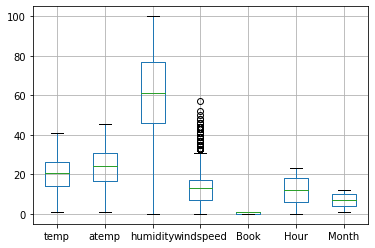

In [24]:
df.drop(["Total_booking"], axis=1).boxplot()

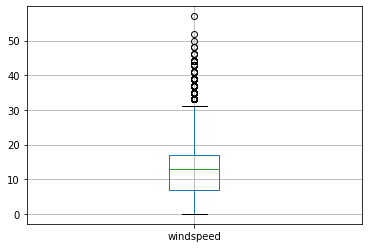

In [25]:
df[["windspeed"]].boxplot()

Removing outlier by finding-

Interquartile Range Formula= Quartile3 - Quartile1

In [26]:
q1=df.windspeed.quantile(.25)
q3=df.windspeed.quantile(.75)
IQR=q3-q1
IQR

9.996400000000001

In [27]:
df.windspeed[df.windspeed< (q1-IQR*1.5)]

Series([], Name: windspeed, dtype: float64)

Finding which points are below (q1-IQR*1.5)

In [28]:
df.windspeed[df.windspeed> (q3+IQR*1.5)]

10      32.9975
32      32.9975
86      32.9975
105     36.9974
182     35.0008
         ...   
8496    32.9975
8555    36.9974
8563    32.9975
8603    35.0008
8640    43.0006
Name: windspeed, Length: 182, dtype: float64

In [29]:
outlier=df.windspeed[df.windspeed> (q3+IQR*1.5)]

In [30]:
len(df)

8708

### Inferences



1.   Only windspeed contains outliers in the datafile.
2.   All outliers were present above third quantile.
2.   Total 182 records were found as outliers.
3.   After removing outliers, 8526 rows were left.



## Correlation

In [31]:
df.corr()

,temp,atemp,humidity,windspeed,Total_booking,Book,Hour,Month
temp,1.000000,0.984035,-0.066442,-0.027824,0.397456,0.390992,0.146668,0.255916
atemp,0.984035,1.000000,-0.044190,-0.068911,0.392754,0.389012,0.141578,0.263176
humidity,-0.066442,-0.044190,1.000000,-0.320302,-0.307899,-0.302856,-0.273222,0.203017
windspeed,-0.027824,-0.068911,-0.320302,1.000000,0.092090,0.088539,0.133037,-0.157710
Total_booking,0.397456,0.392754,-0.307899,0.092090,1.000000,0.762690,0.399947,0.170355
Book,0.390992,0.389012,-0.302856,0.088539,0.762690,1.000000,0.424597,0.187936
Hour,0.146668,0.141578,-0.273222,0.133037,0.399947,0.424597,1.000000,-0.006015
Month,0.255916,0.263176,0.203017,-0.157710,0.170355,0.187936,-0.006015,1.000000


Don't need to use holiday and working day as they are rely basically the same infornation.

In [32]:
df=df.drop(["workingday"], axis=1)
df_test=df_test.drop(["workingday"], axis=1)

In [33]:
data=df[[ "temp", "atemp", "humidity","windspeed", "Book"]]
data.head()

,temp,atemp,humidity,windspeed,Book
0,22.14,25.760,77.0,16.9979,1
1,28.70,33.335,79.0,19.0012,0
2,5.74,6.060,50.0,22.0028,0
3,13.94,16.665,29.0,8.9981,1
4,30.34,33.335,51.0,19.0012,1


In [34]:
data.corr()

,temp,atemp,humidity,windspeed,Book
temp,1.000000,0.984035,-0.066442,-0.027824,0.390992
atemp,0.984035,1.000000,-0.044190,-0.068911,0.389012
humidity,-0.066442,-0.044190,1.000000,-0.320302,-0.302856
windspeed,-0.027824,-0.068911,-0.320302,1.000000,0.088539
Book,0.390992,0.389012,-0.302856,0.088539,1.000000


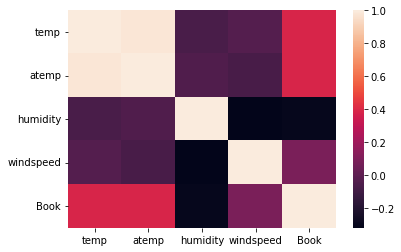

In [35]:
sns.heatmap(data.corr())

## Inferences


1.   temp and humidity affects Total_bookings.
2.   windspeed slightly influence Total_bookings.
3.   temp and atem are highly correlated so need to remove one to reduce redundancy.



In [36]:
df=df.drop(["atemp"], axis=1)
df_test=df_test.drop(["atemp"], axis=1)

## Data Visualization

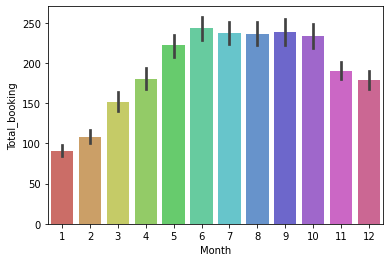

In [37]:
sns.barplot(x="Month", y="Total_booking", data=df, color = 'blue', palette = 'hls')

January and Feburary has very less number of bookings

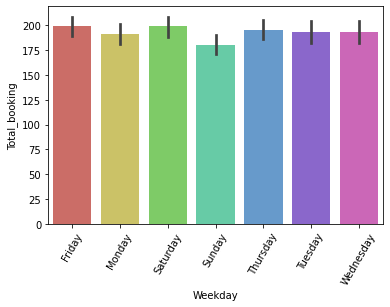

In [38]:
sns.barplot(x="Weekday", y="Total_booking", data=df, color = 'blue', palette = 'hls')
plt.xticks(rotation=60)
plt.show()

Weekdays has approximately no effect on number of bookings

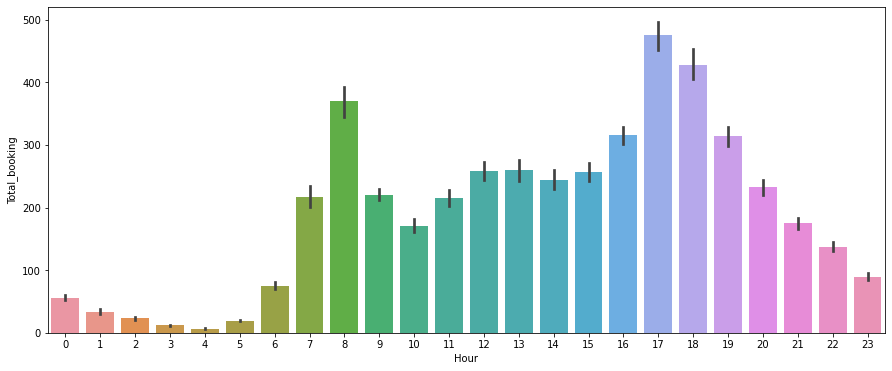

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x="Hour", y="Total_booking", data=df)
plt.show()


*   People generally don't book cabs late night.
*   Bookings are high in morning around 8 and at noon around 6 am. Maybe due to office hours.



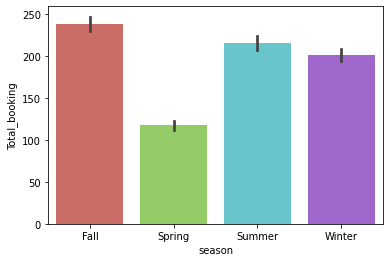

In [40]:
sns.barplot(x="season", y="Total_booking", data=df, palette = 'hls')

People use less cabs on spring season, maybe they like to walk and enjoy weather

In [41]:
df.groupby(["season"])["temp"].agg([np.mean,max,min])

,mean,max,min
season,,,
Fall,28.833732,41.00,15.58
Spring,12.499242,29.52,0.82
Summer,22.809586,38.54,9.84
Winter,16.627694,30.34,5.74


In [42]:
import plotly.express as px
fig = px.scatter(df, x="temp", y="Total_booking", color="season",
                 size='Hour', hover_data=['Weekday', 'Month'])
fig.show()

This plot shows that data is not realtime.


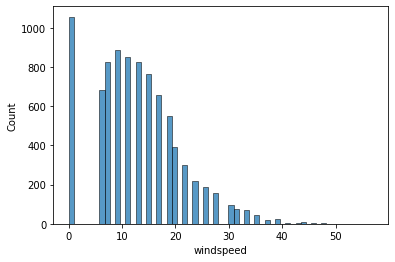

In [43]:
sns.histplot(df["windspeed"])

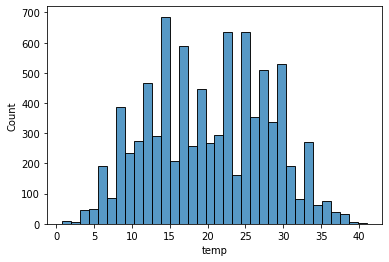

In [44]:
sns.histplot(df["temp"])

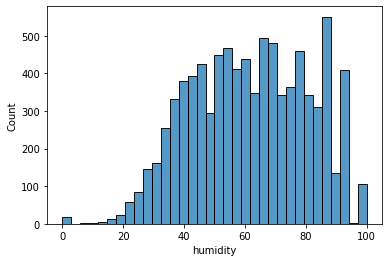

In [45]:
sns.histplot(df["humidity"])

##Feature Scaling

In [46]:
df.describe()

,temp,humidity,windspeed,Total_booking,Book,Hour,Month
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,20.243020,61.653865,12.843891,193.007005,0.500345,11.581190,6.528709
std,7.813494,19.196752,8.190314,181.552211,0.500029,6.890534,3.440879
min,0.820000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,13.940000,46.000000,7.001500,43.000000,0.000000,6.000000,4.000000
50%,20.500000,61.000000,12.998000,148.000000,1.000000,12.000000,7.000000
75%,26.240000,77.000000,16.997900,286.000000,1.000000,18.000000,10.000000
max,41.000000,100.000000,56.996900,977.000000,1.000000,23.000000,12.000000


In [47]:
from sklearn.preprocessing import StandardScaler
scl_t=StandardScaler() # scaling temp
scl_h=StandardScaler() # scaling humidity
scl_w=StandardScaler() # scaling windspeed

In [48]:
df["temp"]=scl_t.fit_transform(df[["temp"]])
df["humidity"]=scl_h.fit_transform(df[["humidity"]])
df["windspeed"]=scl_w.fit_transform(df[["windspeed"]])

In [49]:
df_test.head()

,datetime,season,holiday,weather,temp,humidity,windspeed,Total_booking,Book,Hour,Month,Weekday,Date
0,5/10/2012 11:00,Summer,0,Clear + Few clouds,21.32,48,35.0008,256,1,11,5,Thursday,2012-05-10
1,6/9/2012 7:00,Summer,0,Clear + Few clouds,23.78,64,7.0015,87,0,7,6,Saturday,2012-06-09
2,3/6/2011 20:00,Spring,0,"Light Snow, Light Rain",11.48,100,27.9993,11,0,20,3,Sunday,2011-03-06
3,10/13/2011 11:00,Winter,0,Mist + Cloudy,25.42,83,0.0000,84,0,11,10,Thursday,2011-10-13
4,6/2/2012 12:00,Summer,0,Clear + Few clouds,25.42,43,23.9994,668,1,12,6,Saturday,2012-06-02


In [50]:
df_test["temp"]=scl_t.transform(df_test[["temp"]])
df_test["humidity"]=scl_h.transform(df_test[["humidity"]])
df_test["windspeed"]=scl_w.transform(df_test[["windspeed"]])

# One hot Encoder

In [51]:
from sklearn.preprocessing import OneHotEncoder
def Encoder(data_f, data_test, feature):
  oh=OneHotEncoder()
  out=oh.fit_transform(data_f[[feature]]).toarray() #Transforming the required features
  df_encoded=pd.DataFrame(out, columns=list(oh.categories_[0]), index=data_f.index)  #Storing it in a new dataFrame;
  out=oh.transform(data_test[[feature]]).toarray()  #Converting for Test 
  df_test_encoded=pd.DataFrame(out, columns=list(oh.categories_[0]), index=data_test.index)
  return data_f.join(df_encoded), data_test.join(df_test_encoded)         #Joining New data Frame with the orignal

Converting Categorical data to numerical type  to be provided to machine and deep learning algorithms

In [52]:
df, df_test=Encoder(df, df_test, "weather")
df, df_test=Encoder(df, df_test, "season")
df, df_test=Encoder(df, df_test, "Weekday")
df[["season", "Summer", "Fall", "Spring", "Winter"]]

,season,Summer,Fall,Spring,Winter
0,Summer,1.0,0.0,0.0,0.0
1,Fall,0.0,1.0,0.0,0.0
2,Spring,0.0,0.0,1.0,0.0
3,Winter,0.0,0.0,0.0,1.0
4,Fall,0.0,1.0,0.0,0.0
...,...,...,...,...,...
8703,Spring,0.0,0.0,1.0,0.0
8704,Winter,0.0,0.0,0.0,1.0
8705,Summer,1.0,0.0,0.0,0.0
8706,Winter,0.0,0.0,0.0,1.0


In [53]:
df=df.drop(["Weekday", "season", "weather"], axis=1)    #Removing previous features and retaing New information
df.head()

,holiday,temp,humidity,windspeed,Total_booking,Book,Hour,Month,Date,Clear + Few clouds,...,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0.242796,0.799459,0.507215,504,1,19,5,2012-05-02,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1.082418,0.903649,0.751823,5,0,4,9,2012-09-05,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,-1.856257,-0.607110,1.118325,139,0,9,1,2011-01-13,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,-0.806730,-1.701108,-0.469580,209,1,16,11,2011-11-18,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.292323,-0.555015,0.751823,184,1,13,9,2011-09-13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Split

Using only 4000 training features.

In [54]:
#df=df[:4000]

In [55]:
from sklearn.model_selection import train_test_split
X=df.drop(["Total_booking", "Date", "Book"], axis=1)
y=df["Book"]
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=.3, shuffle=True)

In [56]:
pd.set_option('display.max_columns', None)
X_train.head()

,holiday,temp,humidity,windspeed,Hour,Month,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3938,0,1.712134,-1.232251,0.507215,18,8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1549,0,0.662607,0.851554,-0.469580,21,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3327,0,1.607181,-1.336442,-0.835265,16,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6714,0,-1.646352,-0.763395,0.507215,22,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1774,0,1.712134,-1.075966,1.118325,14,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, accuracy_score

###With outlier

In [58]:
m=LogisticRegression(max_iter=1000, penalty="l2", solver="saga");
m.fit(X_train, y_train)
y_pred=m.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8006123230003827

###Without outlier

In [59]:
df.drop(outlier.index, axis=0, inplace=True)
X=df.drop(["Total_booking", "Date", "Book"], axis=1)
y=df["Book"]
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=.3, shuffle=True)
m=LogisticRegression(max_iter=1000, penalty="l2", solver="saga");
m.fit(X_train, y_train)
y_pred=m.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7783424550430024

In [60]:
X_train.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'Hour', 'Month',
       ' Clear + Few clouds', ' Heavy Rain + Thunderstorm ',
       ' Light Snow, Light Rain', ' Mist + Cloudy ', 'Fall', 'Spring',
       'Summer', 'Winter', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [61]:
importance = m.coef_[0]
importance

array([ 0.20817835,  1.15857551, -0.60353153,  0.05883903,  0.1264881 ,
        0.17150016, -0.18357764,  0.78016758, -0.92662523,  0.06583293,
       -0.70845623,  0.25822788,  0.14886526,  0.03716072,  0.26133463,
       -0.06595406, -0.04657669, -0.21367058, -0.09221416, -0.1137824 ,
        0.00666089])

Importance vs features

In [62]:
import plotly.express as px
fig = px.bar(y=importance, x=X_train.columns, labels=dict(x="Features", y="Importance"))
fig.update_xaxes(type='category')
fig.show()

##PCA

In [63]:
X_train.shape, X_valid.shape

((5968, 21), (2558, 21))

In [64]:

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 10)
  
pca.fit(X_train)
  
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.74315253, 0.18737393, 0.01761806, 0.01602741, 0.01041653,
       0.0049361 , 0.00387825, 0.00227305, 0.00224197, 0.00223354])

[Text(0, 0.5, 'Explained Variance'), Text(0.5, 0, 'Components')]

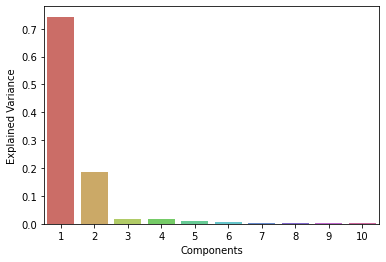

In [65]:
fig=sns.barplot(x=[1,2,3,4,5,6,7,8,9,10], y=explained_variance, color = 'blue', palette = 'hls')
fig.set(xlabel='Components', ylabel='Explained Variance')

In [66]:
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
pca.explained_variance_ratio_

array([0.74315253, 0.18737393, 0.01761806, 0.01602741, 0.01041653])

In [305]:
sum(pca.explained_variance_ratio_)

0.9745604505502647

## Tuning Logistic Regression

In [306]:
import math

In [307]:
m=LogisticRegression(max_iter=100, C=100);
m.fit(X_train, y_train)
y_pred=m.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7947615324472244

In [308]:
math.sqrt(mean_squared_error(y_valid, y_pred))

0.4530325237251467

In [309]:
m=LogisticRegression(max_iter=1000, penalty="l2", solver="saga");
m.fit(X_train, y_train)
y_pred=m.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7951524628616107

In [ ]:
from sklearn.metrics import mean_squared_log_error
print("Mean squared log error is- ", mean_squared_log_error(y_valid, y_pred))

Mean squared log error is-  0.10705950661977123


##Lasso


Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [ ]:
np.linspace(0.1,100)

array([  0.1       ,   2.13877551,   4.17755102,   6.21632653,
         8.25510204,  10.29387755,  12.33265306,  14.37142857,
        16.41020408,  18.44897959,  20.4877551 ,  22.52653061,
        24.56530612,  26.60408163,  28.64285714,  30.68163265,
        32.72040816,  34.75918367,  36.79795918,  38.83673469,
        40.8755102 ,  42.91428571,  44.95306122,  46.99183673,
        49.03061224,  51.06938776,  53.10816327,  55.14693878,
        57.18571429,  59.2244898 ,  61.26326531,  63.30204082,
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367347,  95.92244898,
        97.96122449, 100.        ])

###Cost vs c

In [314]:
et=[]
ev=[]
for l in np.linspace(0.1,100):
  lass = LogisticRegression(max_iter=100, C=l,solver="saga", penalty="l1");
  lass.fit(X_train, y_train)
  y_pred=lass.predict(X_train)
  et.append(math.sqrt(mean_squared_error(y_train, y_pred)))
  y_pred=lass.predict(X_valid)
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))

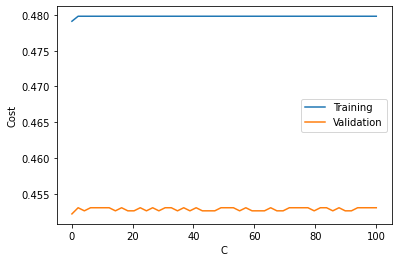

In [315]:
plt.plot( np.linspace(0.1,100), et, label="Training")
plt.plot( np.linspace(0.1,100), ev, label="Validation")
plt.xlabel("C")
plt.ylabel("Cost")
plt.legend()

In [316]:
ev[0:5]

[0.45216878123550625,
 0.4530325237251467,
 0.4526008585259084,
 0.4530325237251467,
 0.4530325237251467]

##Learning Curve

##Ridge

###Cost vs c

In [317]:
et=[]
ev=[]
for l in np.linspace(0.1,200):
  ridge=LogisticRegression(max_iter=1000, penalty="l2", C=l);
  ridge.fit(X_train, y_train)
  y_pred=ridge.predict(X_train)
  et.append(math.sqrt(mean_squared_error(y_train, y_pred)))
  y_pred=ridge.predict(X_valid)
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))

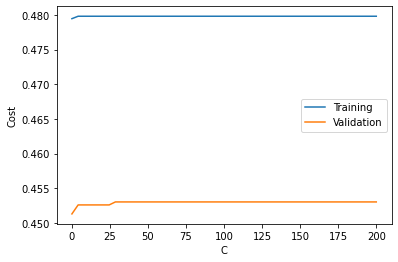

In [318]:
plt.plot( np.linspace(0.1,200), et, label="Training")
plt.plot( np.linspace(0.1,200), ev, label="Validation")
plt.xlabel("C")
plt.ylabel("Cost")
plt.legend()

In [319]:
ev[0:5]

[0.45130338564565486,
 0.4526008585259084,
 0.4526008585259084,
 0.4526008585259084,
 0.4526008585259084]

###Cost vs Number of training examples

In [ ]:
et=[]
ev=[]
for i in range(10,len(X_train)):
  ridge = LogisticRegression(max_iter=10000, penalty="l2", solver="saga", C=0.1);
  ridge.fit(X_train[:i], y_train[:i])
  y_pred=ridge.predict(X_train[:i])
  et.append(math.sqrt(mean_squared_error(y_train[:i], y_pred)))
  y_pred=ridge.predict(X_valid)
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))

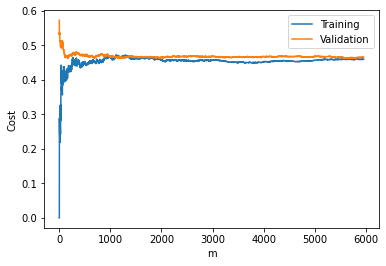

In [ ]:
plt.plot(et, label="Training")
plt.plot(ev, label="Validation")
plt.xlabel("m")
plt.ylabel("Cost")
plt.legend()

After using more than 200 training examples model starts to perform well.

###Cost vs Number of Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
et=[]
ev=[]
for i in range(1,5):
  ridge = LogisticRegression(max_iter=100000, penalty="l2", C=0.1);
  poly = PolynomialFeatures(i)
  X_poly=poly.fit_transform(X_train)
  ridge.fit(X_poly, y_train)
  y_pred=ridge.predict(X_poly)
  et.append(math.sqrt(mean_squared_error(y_train, y_pred)))
  y_pred=ridge.predict(poly.transform(X_valid))
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))

In [ ]:
et

[0.46887006951942756,
 0.39708218637277654,
 0.3907012325077948,
 0.3704482467029027]

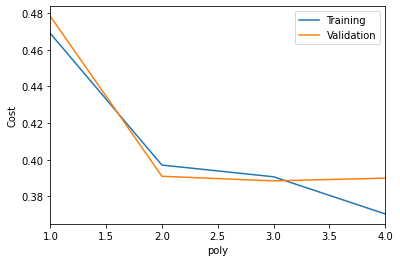

In [ ]:
plt.plot(range(1,5), et, label="Training")
plt.plot(range(1,5), ev, label="Validation")
plt.xlim([1,4])
plt.xlabel("poly")
plt.ylabel("Cost")
plt.legend()

After increasing polynomial features more than 2 degree model starts to overfit.

###Cost vs Number of training examples

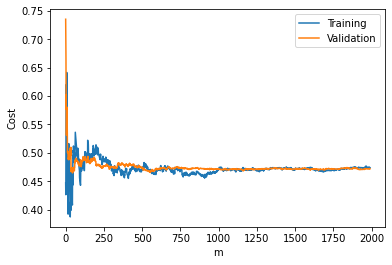

In [ ]:
et=[]
ev=[]
for i in range(10,2000):
  ridge = LogisticRegression(max_iter=100000, penalty="l2", C=0.1);
  poly = PolynomialFeatures(2)
  X_poly=poly.fit_transform(X_train)
  ridge.fit(X_train[:i], y_train[:i])
  y_pred=ridge.predict(X_train[:i])
  et.append(math.sqrt(mean_squared_error(y_train[:i], y_pred)))
  y_pred=ridge.predict(X_valid)
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))
plt.plot(et, label="Training")
plt.plot(ev, label="Validation")
plt.xlabel("m")
plt.ylabel("Cost")
plt.legend()

## Perform predictions

In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
ridge = LogisticRegression(max_iter=1000, penalty="l2", C=0.1);
poly = PolynomialFeatures(2)
X_poly=poly.fit_transform(X_train)
ridge.fit(X_poly, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [68]:
df_test=df_test.drop(["Weekday", "season", "weather", "Date", "datetime"], axis=1)
df_test.head()

,holiday,temp,humidity,windspeed,Total_booking,Book,Hour,Month,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0.137844,-0.711300,2.705413,256,1,11,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.452702,0.122222,-0.713370,87,0,7,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,-1.121588,1.997647,1.850513,11,0,20,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0.662607,1.112030,-1.568271,84,0,11,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.662607,-0.971776,1.362115,668,1,12,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [69]:
X_test=df_test.drop(["Total_booking", "Book"], axis=1)
X_test = pca.transform(X_test)
y_test=df_test["Book"]

In [70]:
X_test_poly=poly.transform(X_test)

In [71]:
y_pred=ridge.predict(X_test_poly)
accuracy_score(y_test, y_pred)

0.8489439853076217

In [72]:
ridge.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [73]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1084
           1       0.85      0.85      0.85      1094

    accuracy                           0.85      2178
   macro avg       0.85      0.85      0.85      2178
weighted avg       0.85      0.85      0.85      2178



In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[922 162]
 [167 927]]


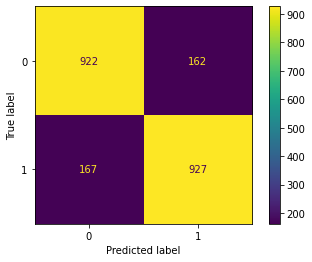

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ridge, X_test_poly, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.8464692482915718

In [ ]:
Error_LR=df_test[y_test!=y_pred]
len(Error_LR)

337

##ROC curve

In [ ]:
y_pred=ridge.predict(poly.transform(X_valid))

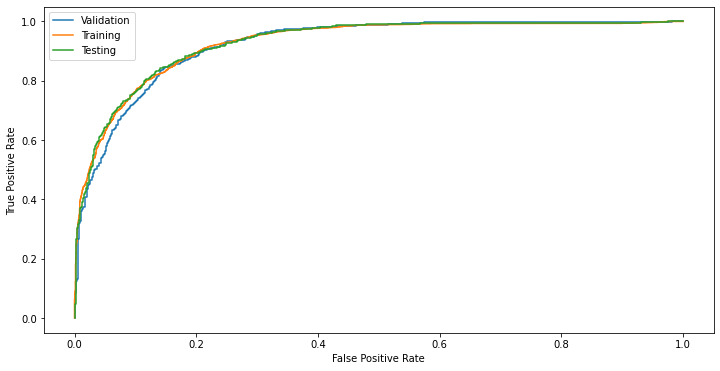

In [79]:
from sklearn import metrics
y_pred_proba = ridge.predict_proba(poly.transform(X_valid))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr, label="Validation")
y_pred_proba = ridge.predict_proba(poly.transform(X_train))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
plt.plot(fpr,tpr, label="Training")
y_pred_proba = ridge.predict_proba(poly.transform(X_test))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr, label="Testing")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_valid, y_pred)

0.8557872819846966

In [ ]:
import math
math.sqrt(mean_squared_error(y_valid, y_pred))

0.3798069547921974

##Alternative Model

Cost vs C

In [ ]:
et=[]
ev=[]
for l in np.linspace(0.1,200):
  ridge=SVC(kernel= 'rbf', C=l);
  ridge.fit(X_train, y_train)
  y_pred=ridge.predict(X_train)
  et.append(math.sqrt(mean_squared_error(y_train, y_pred)))
  y_pred=ridge.predict(X_valid)
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))

In [ ]:
et[:10]

[0.3861718352328115,
 0.36383052944399263,
 0.361520470981019,
 0.358027437653318,
 0.35732473346726656,
 0.35732473346726656,
 0.3566206446383967,
 0.3566206446383967,
 0.3547362423105075,
 0.35426357555518945]

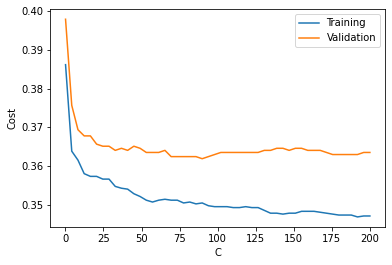

In [ ]:
plt.plot( np.linspace(0.1,200), et, label="Training")
plt.plot( np.linspace(0.1,200), ev, label="Validation")
plt.xlabel("C")
plt.ylabel("Cost")
plt.legend()

Cost vs Number of training examples

In [ ]:
et=[]
ev=[]
for i in range(10,len(X_train)-5000):
  ridge=SVC();
  ridge.fit(X_train[:i], y_train[:i])
  y_pred=ridge.predict(X_train[:i])
  et.append(math.sqrt(mean_squared_error(y_train[:i], y_pred)))
  y_pred=ridge.predict(X_valid)
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))

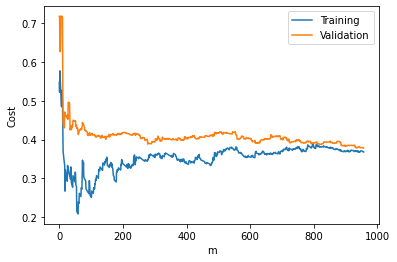

In [ ]:
plt.plot(et[:], label="Training")
plt.plot(ev[:], label="Validation")
plt.xlabel("m")
plt.ylabel("Cost")
plt.legend()

Cost vs polynomial features

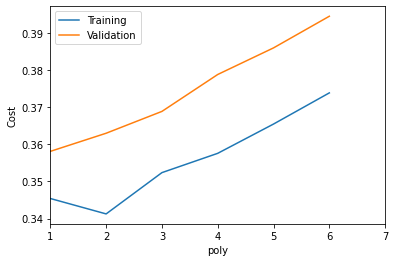

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
et=[]
ev=[]
for i in range(1,7):
  sv = SVC(C= 200, kernel= 'rbf');
  poly = PolynomialFeatures(i)
  X_poly=poly.fit_transform(X_train)
  sv.fit(X_poly, y_train)
  y_pred=sv.predict(X_poly)
  et.append(math.sqrt(mean_squared_error(y_train, y_pred)))
  y_pred=sv.predict(poly.transform(X_valid))
  ev.append(math.sqrt(mean_squared_error(y_valid, y_pred)))
plt.plot(range(1,7), et, label="Training")
plt.plot(range(1,7), ev, label="Validation")
plt.xlim([1,6])
plt.xlabel("poly")
plt.ylabel("Cost")
plt.legend()

ROC Curve

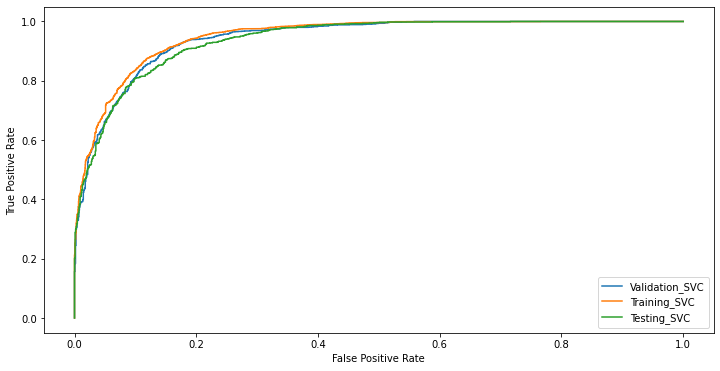

In [80]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
sv = SVC(C= 200, kernel= 'rbf', probability=True);
sv.fit(X_train, y_train)
y_pred=sv.predict(X_valid)
y_pred_proba = sv.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr, label="Validation_SVC")
y_pred_proba = sv.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
plt.plot(fpr,tpr, label="Training_SVC")
y_pred_proba = sv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr, label="Testing_SVC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

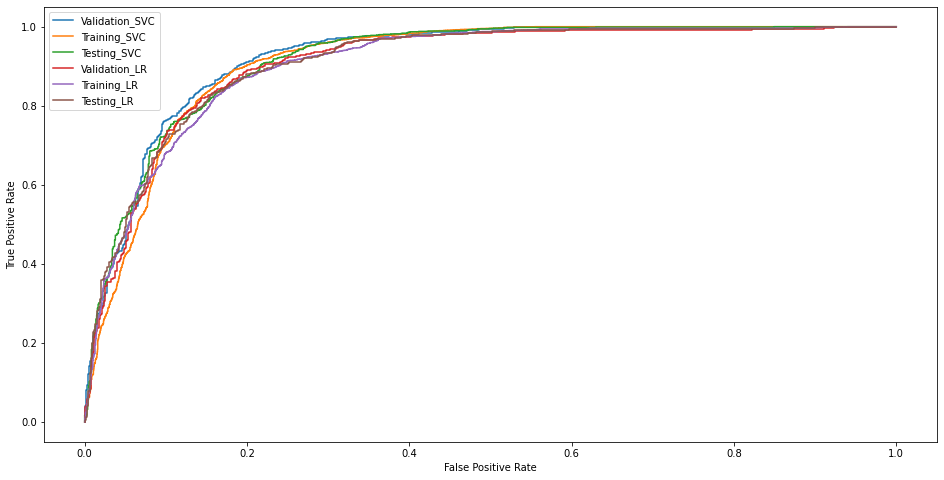

In [ ]:
y_pred_proba = sv.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
plt.figure(figsize=(16,8))
plt.plot(fpr,tpr, label="Validation_SVC")
y_pred_proba = sv.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
plt.plot(fpr,tpr, label="Training_SVC")
y_pred_proba = sv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr, label="Testing_SVC")
y_pred_proba = ridge.predict_proba(poly.transform(X_valid))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
plt.plot(fpr,tpr, label="Validation_LR")
y_pred_proba = ridge.predict_proba(poly.transform(X_train))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
plt.plot(fpr,tpr, label="Training_LR")
y_pred_proba = ridge.predict_proba(poly.transform(X_test))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr, label="Testing_LR")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_valid, y_pred)

0.8874631152125793

In [ ]:
math.sqrt(mean_squared_error(y_valid, y_pred))

0.33554129305234087

##Error


In [81]:
model_svc = SVC(C= 200, kernel= 'rbf');
model_svc.fit(X_train, y_train)
y_pred=model_svc.predict(X_valid)
roc_auc_score(y_valid, y_pred)

0.8737918656774851

In [83]:
import math
math.sqrt(mean_squared_error(y_valid, y_pred))

0.35424379037321574

In [84]:
y_pred=sv.predict(X_test)
f1_score(y_test, y_pred)

0.8623024830699774

In [85]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1084
           1       0.85      0.87      0.86      1094

    accuracy                           0.86      2178
   macro avg       0.86      0.86      0.86      2178
weighted avg       0.86      0.86      0.86      2178



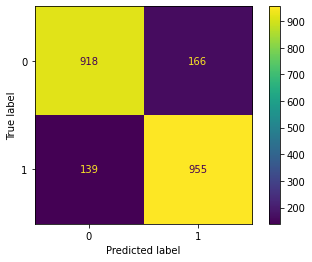

In [88]:
plot_confusion_matrix(sv, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.8610987047789191

In [ ]:
Error_SVC=df_test[y_test!=y_pred]
len(Error_SVC)

311

In [ ]:
inter=pd.merge(Error_LR, Error_SVC, how ='inner')
inter.head()

,holiday,temp,humidity,windspeed,Total_booking,Book,Hour,Month,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0.446786,0.104941,-0.713037,87,0,7,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.656768,1.104685,-1.647701,84,0,11,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,-1.338066,-1.420984,1.289558,167,1,18,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.866751,1.420394,-0.713037,114,0,17,9,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.866751,-0.421240,0.354895,119,0,8,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


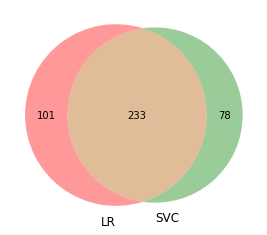

In [ ]:
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (len(Error_LR)-len(inter), len(Error_SVC)-len(inter), len(inter)), set_labels = ('LR', 'SVC'))
plt.show()

In [ ]:
p = { 
    'C': [50, 200, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #'max_iter' : [1000,10000],
}
g_cv=GridSearchCV(estimator=SVC(), param_grid=p, cv=5)
g_cv.fit(X_train, y_train)
g_cv.best_params_

{'C': 200, 'kernel': 'rbf'}

In [ ]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

## Other Models

In [ ]:
models=[RandomForestClassifier(),
        SVC(C= 200, kernel= 'rbf'),
        KNeighborsClassifier(),
        LogisticRegression(max_iter=1000, penalty="l2", C=50)]
rme=[]
name=[]
for m in models:
  name.append(m.__class__.__name__)
  m.fit(X_train, y_train)
  y_pred=m.predict(X_valid)
  rme.append(math.sqrt(mean_squared_error(y_valid, y_pred)))
s=pd.Series(name,rme)
s

0.364040    RandomForestClassifier
0.363503                       SVC
0.384919      KNeighborsClassifier
0.471220        LogisticRegression
dtype: object

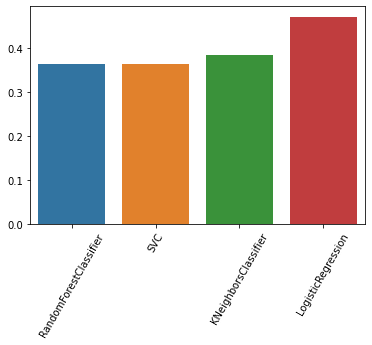

In [ ]:
sns.barplot(x=s.values, y=s.index)
plt.xticks(rotation=60)
plt.show()

## Prediction

In [ ]:
model=SVC(C= 200, kernel= 'rbf')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.857208448117539

In [ ]:
corr_classified=df_test[y_test==y_pred]
corr_classified.drop(["Total_booking", "Book"], axis=1).head()

,holiday,temp,humidity,windspeed,Hour,Month,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0.131812,-0.736949,3.024724,11,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,-1.128084,1.999193,2.090060,20,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.656768,-1.000040,1.556094,12,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0,-1.023092,-0.052913,-0.846305,23,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.341794,0.841594,0.621430,18,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
miss_classified=df_test[y_test!=y_pred]
miss_classified.iloc[4]

holiday                          0.000000
temp                             0.866751
humidity                        -0.421240
windspeed                        0.354895
Total_booking                  119.000000
Book                             0.000000
Hour                             8.000000
Month                            8.000000
 Clear + Few clouds              1.000000
 Heavy Rain + Thunderstorm       0.000000
 Light Snow, Light Rain          0.000000
 Mist + Cloudy                   0.000000
Fall                             1.000000
Spring                           0.000000
Summer                           0.000000
Winter                           0.000000
Friday                           0.000000
Monday                           0.000000
Saturday                         0.000000
Sunday                           1.000000
Thursday                         0.000000
Tuesday                          0.000000
Wednesday                        0.000000
Name: 33, dtype: float64

In [ ]:
corr_classified[corr_classified["Book"]==0].drop(["Total_booking", "Book"], axis=1).describe()

,temp,humidity,windspeed,Hour,Month,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.0,903.000000,903.000000,903.000000,903.000000,903.00000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,-0.468487,0.403868,-0.160288,7.354374,5.700997,0.634551,0.0,0.106312,0.259136,0.184939,0.385382,0.20155,0.228128,0.124031,0.139535,0.137320,0.146179,0.142857,0.148394,0.161683
std,0.903000,0.984002,1.025150,7.661535,3.737695,0.481823,0.0,0.308408,0.438403,0.388463,0.486955,0.40138,0.419858,0.329800,0.346696,0.344376,0.353482,0.350121,0.355687,0.368364
min,-2.177997,-3.262618,-1.647701,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.233075,-0.368622,-0.846305,2.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.603127,0.525886,-0.179071,4.000000,5.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.236803,1.315157,0.354895,11.000000,9.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.706681,1.999193,4.225923,23.000000,12.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
miss_classified.Book.value_counts()

0    181
1    130
Name: Book, dtype: int64